Visualise the various CONFEX CFX generation methods: CONFEX-Naive, CONFEX-LCP and CONFEX-Tree.

In [1]:
import sys, os
sys.path.append(os.path.abspath(".."))

from pycfx.datasets import *
from pycfx.models import *
from pycfx.benchmarker import *
from pycfx.helpers.visualisation import *
from pycfx.conformal import *
from pycfx.counterfactual_explanations import *

In [2]:
#Initialise dataset

Dataset = SyntheticBimodal
dataset_kwargs = {"size": 4}
factual = np.array([0, 4])
y_target = 1 

<Axes: >

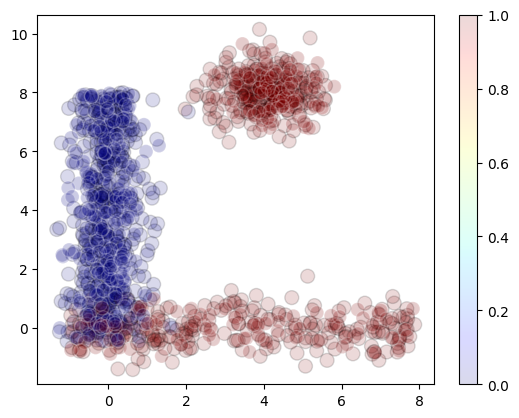

In [3]:
#Visualise dataset

dataset = Dataset(0.6, 0.2, 0.2, **dataset_kwargs)
X_train, y_train, X_calib, y_calib, X_test, y_test = dataset.get_X_y_split()
plot_split_dataset(X_train, X_test, y_train, y_test)

In [4]:
# Load or train model

model = PyTorchMLP(config={}, input_properties=dataset.input_properties)
model.load_or_train(Path("mlp_bimodal_data"), X_train, y_train, True)

<Axes: >

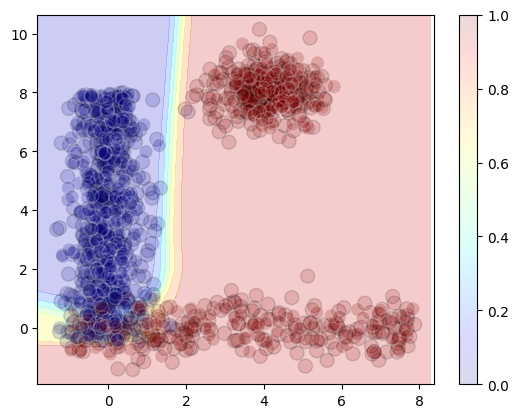

In [5]:
# Plot decision boundary 

plot_decision_boundary(model, X_train, X_test, y_train, y_test)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2688232
Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Set parameter TimeLimit to value 60
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 59 rows, 108 columns and 266 nonzeros
Model fingerprint: 0x63e9b132
Model has 50 general constraints
Variable types: 108 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [8e-04, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 4e+00]
Presolve added 46 rows and 96 columns
Presolve time: 0.00s
Presolved: 105 rows, 204 columns, 358 nonzeros
Presolved model has 100 SOS constraint(s)
Variable types: 104 contin

<Axes: >

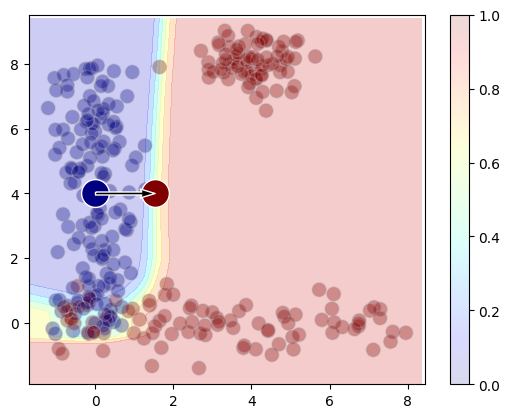

In [6]:
#Obtain Min Distance CFX

cf_gen = MinDistanceCF(model, dataset.input_properties, config={"db_distance":0.05})
counterfactual = cf_gen.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual, model, X_calib, X_calib, y_calib, y_calib, faded_background=True)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 62 rows, 110 columns and 272 nonzeros
Model fingerprint: 0xd7cfad14
Model has 50 general constraints
Variable types: 110 continuous, 0 integer (0 binary)
Coefficient statistics:
  Matrix range     [8e-04, 3e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-02, 4e+00]
Presolve added 43 rows and 94 columns
Presolve time: 0.00s
Presolved: 105 rows, 204 columns, 358 nonzeros
Presolved model has 100 SOS constraint(s)
Variable types: 104 continuous, 100 integer (100 binary)

Root relaxation: objective 0.000000e+00, 80 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  

<Axes: >

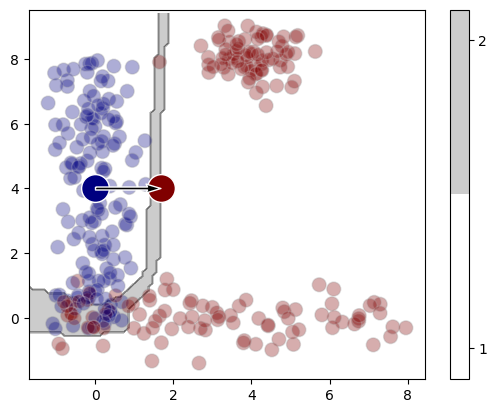

In [7]:
# Obtain CONFEX-Naive CFX: using split conformal prediction naively in the formulation, finding the closest point with a singleton set size.

conformalCF = ConformalCF(model, dataset.input_properties, config={"conformal_class": SplitConformalPrediction, "conformal_config": {"alpha": 0.01}})
conformalCF.setup(X_train, y_train, X_calib, y_calib)
counterfactual_conformal = conformalCF.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual_conformal, model, X_calib, X_calib, y_calib, y_calib, conformal=conformalCF.conformal)

In [8]:
# Visualise the LCP (Guan, 2021) set size over the dataset.

ccf = {"alpha": 0.03,
        "scorefn_name":'linear',
        "kernel_name":'box_l1', 
        "kernel_bandwidth": 0.35}

<Axes: >

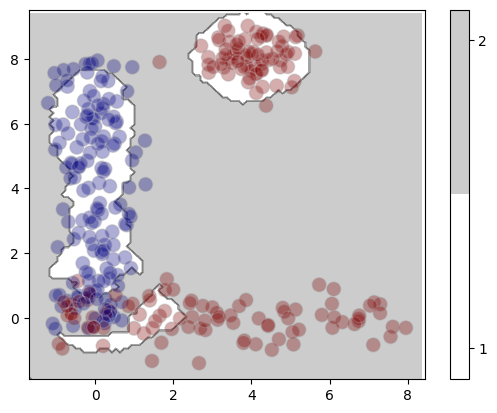

In [9]:
conformal_cfxt = BaseLCP(model, dataset.input_properties, ccf)
conformal_cfxt.calibrate(X_calib, y_calib, None)
plot_conformal_prediction(model, conformal_cfxt, X_calib, X_calib, y_calib, y_calib)

In [10]:
# CONFEX-LCP: CONFEX using LCP prediction regions for more principled uncertainty quantification

conformalCF_b = ConformalCF(model, dataset.input_properties, config={"conformal_class": BaseLCP, "conformal_config": ccf})
conformalCF_b.setup(X_train, y_train, X_calib, y_calib)
counterfactual_conformal_b = conformalCF_b.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual_conformal_b, model, X_calib, X_calib, y_calib, y_calib, conformal=conformalCF_b.conformal)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 3257 rows, 3625 columns and 7937 nonzeros
Model fingerprint: 0x89f0d71f
Model has 1 quadratic constraint
Model has 370 general constraints
Variable types: 2986 continuous, 639 integer (639 binary)
Coefficient statistics:
  Matrix range     [8e-04, 1e+03]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-06, 1e+03]
Presolve removed 383 rows and 755 columns
Presolve time: 0.26s
Presolved: 2874 rows, 2870 columns, 14543 nonzeros
Presolved model has 638 SOS constraint(s)
Variable types: 2021 continuous, 849 integer (689 binary)

Root relaxation: objective 0.000000e+00, 762 iterations, 0.01 

<Axes: >

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 23.6.0 23G80)

CPU model: Apple M3 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Academic license 2688232 - for non-commercial use only - registered to am___@kcl.ac.uk
Optimize a model with 72 rows, 143 columns and 357 nonzeros
Model fingerprint: 0x740e2b33
Model has 3 quadratic constraints
Model has 128 general constraints
Variable types: 123 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [8e-04, 1e+02]
  QMatrix range    [1e+00, 1e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-06, 4e+00]
  GenCon rhs range [3e-02, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 96 rows and 30 columns
Presolve time: 0.01s
Presolved: 168 rows, 173 columns, 870 nonzeros
Presolved model has 10 SOS constraint(s)
Variable types: 115 continuous, 58 integer (58 binary)
Found heurist

<Axes: >

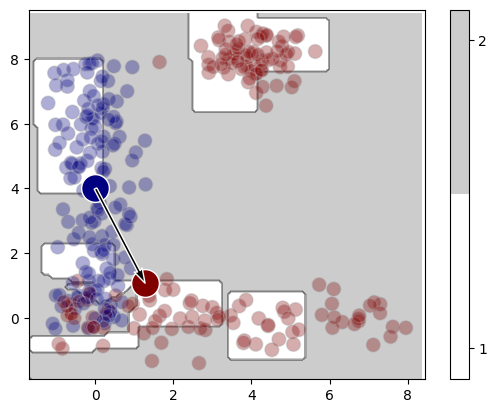

In [17]:
# CONFEX-Tree: CONFEX using tree-based representation of local quantiles for an efficient encoding of localised conformal prediction constraint.

ccf2 = {"alpha": 0.03,
        "scorefn_name":'linear2',
        "kernel_bandwidth": 0.4,
        "inf_quantile": True,
        }

conformalCF_c = ConformalCF(model, dataset.input_properties, config={"conformal_class": ConformalCONFEXTree, "conformal_config": ccf2})
conformalCF_c.setup(X_train, y_train, X_calib, y_calib)
counterfactual_conformal_c = conformalCF_c.generate_counterfactual(factual, y_target)
plot_counterfactual(factual, counterfactual_conformal_c, model, X_calib, X_calib, y_calib, y_calib, conformal=conformalCF_c.conformal)